In [1]:
import numpy as np
import pandas as pd
from scipy.stats import linregress

# Reading Raw Files

In [3]:
files = []
#for y in range(16, 22):
for y in range(16, 17):
    for m in range(1, 13):
        for d in range(1, 32):
            if m<10 and d<10:
                fp = 'C:/data/Eventi/Muoni_Eventi_20{}_0{}_0{}.txt'.format(y, m, d)
            elif m<10 and d>=10:
                fp = 'C:/data/Eventi/Muoni_Eventi_20{}_0{}_{}.txt'.format(y, m, d)
            elif m>=10 and d<10:
                fp = 'C:/data/Eventi/Muoni_Eventi_20{}_{}_0{}.txt'.format(y, m, d)
            elif m>=10 and d>=10:
                fp = 'C:/data/Eventi/Muoni_Eventi_20{}_{}_{}.txt'.format(y, m, d)
            files.append(fp)

In [4]:
evts_bin = []
for file in files:
    try:
        data = open(file, 'r')
        raw = data.readlines()
        lines = [raw[i:i+3] for i in range(0, len(raw)-2, 3)]
        for line in lines:
            master, slave = line[2], line[1]
            x_hex = [master[i:i+3] for i in range(0, len(master)-2, 3)]
            y_hex = [slave[i:i+3] for i in range(0, len(slave)-2, 3)]
            x_bin = [f'{int(x,16):0>12b}' for x in x_hex]
            y_bin = [f'{int(y,16):0>12b}' for y in y_hex]
            evts_bin.append(np.array([x_bin, y_bin]))
    except: None
evts_bin = np.array(evts_bin)

# Decripting Raw Files

In [6]:
Master = pd.DataFrame(evts_bin[:,0], columns = ['x{:}'.format(n) for n in range(10)])
Master

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,000000000010,000000000010,000000000010,000000000001,000000000100,000000000100,000000000100,000000000000,000000001000,000000001000
1,000010000000,000100000000,000100000000,000100000000,000100000000,001000000000,001000000000,001000000000,001000000000,000000000000
2,000011000000,000001000000,000001000000,000001000000,000001000000,000001000000,000001000000,000001000000,000000100000,000010000000
3,000000000000,000000000100,000000001011,000000000001,000000000111,000010000000,001100000000,001000000000,000000000000,000010000000
4,000000000000,001000000000,001000000000,000100000000,000010000000,000001000000,000001000000,000000100000,000000000000,000000001000
...,...,...,...,...,...,...,...,...,...,...
140658,000000100000,000000100000,000000100000,000000100000,000100110000,000000100000,000000100000,000001100000,001000100000,000000100000
140659,000000100000,000000001000,000000010000,000000100000,000001000000,000010000000,000100000000,001000000000,000000000000,000000000000
140660,000000000000,000000000000,000010100000,000011000000,000110000000,000011000000,000001000000,000010000000,000010000000,000010000000
140661,000000100000,000000100000,000000010000,000000001000,000000000100,000000001000,000000000010,000000100000,000000000001,000000000000


In [7]:
Slave = pd.DataFrame(evts_bin[:,1], columns = ['y{:}'.format(n) for n in range(10)])
Slave

,y0,y1,y2,y3,y4,y5,y6,y7,y8,y9
0,000000100000,000000110000,000000100000,000000100000,000001000000,000001000000,000001000000,000000000000,000001000000,000000000000
1,000000000000,000100000000,000100000000,000100000000,000100000000,000100000000,000100000000,000000000000,000000000000,000000000000
2,000000001000,000000011000,000000010000,000000010000,000000010000,000000010000,000000010000,000000010000,000000010000,000000010000
3,000000000000,000000000000,000000000110,000000110000,000010000000,000000100010,000000000001,000100000000,000000000000,000000000000
4,000000000000,000000000000,000000000010,000000000010,000000000010,000000000010,000000000010,000000000010,000000000000,000000000000
...,...,...,...,...,...,...,...,...,...,...
140658,001000000000,001000000000,000100000000,000100000000,000100000000,000100000001,000010000000,000010000000,000001000000,000000000000
140659,000000000000,000000000010,000000000100,000000010000,000000100000,000001000000,000100000000,001000000000,000000000000,000000000000
140660,000000000000,000000000000,000001000000,001010000000,000110000000,000010000000,000001000000,000000100000,000000010000,000000001000
140661,000000000000,001000000000,000100000000,000010000000,000001000000,000000100000,000000010000,000000001000,000000000000,000000000000


In [8]:
d = 4
master, slave = evts_bin[:,0], evts_bin[:,1]
def bin_to_cartesian(a, d):
    X = []
    for e in a:
        track = []
        for i in range(10):
            num, den = 0, 0
            for j in range(10):
                num += int(e[i][j+2])*(2 + j*d)
                den += int(e[i][j+2])
            try: x = num/den
            except: x = np.nan
            finally: track.append(x)
        X.append(track)
    return X
xz = bin_to_cartesian(master, d)
yz = bin_to_cartesian(slave, d)

In [9]:
XZ = pd.DataFrame(xz, columns = ['x{:}'.format(n) for n in range(10)])
XZ.to_csv('master16')
XZ

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,34.0,34.0,34.000000,38.0,30.000000,30.0,30.0,NaN,26.0,26.0
1,10.0,6.0,6.000000,6.0,6.000000,2.0,2.0,2.0,2.0,NaN
2,12.0,14.0,14.000000,14.0,14.000000,14.0,14.0,14.0,18.0,10.0
3,NaN,30.0,32.666667,38.0,34.000000,10.0,4.0,2.0,NaN,10.0
4,NaN,2.0,2.000000,6.0,10.000000,14.0,14.0,18.0,NaN,26.0
...,...,...,...,...,...,...,...,...,...,...
140658,18.0,18.0,18.000000,18.0,15.333333,18.0,18.0,16.0,10.0,18.0
140659,18.0,26.0,22.000000,18.0,14.000000,10.0,6.0,2.0,NaN,NaN
140660,NaN,NaN,14.000000,12.0,8.000000,12.0,14.0,10.0,10.0,10.0
140661,18.0,18.0,22.000000,26.0,30.000000,26.0,34.0,18.0,38.0,NaN


In [10]:
YZ = pd.DataFrame(yz, columns = ['y{:}'.format(n) for n in range(10)])
YZ.to_csv('slave16')
YZ

,y0,y1,y2,y3,y4,y5,y6,y7,y8,y9
0,18.0,20.0,18.0,18.0,14.0,14.0,14.0,NaN,14.0,NaN
1,NaN,6.0,6.0,6.0,6.0,6.0,6.0,NaN,NaN,NaN
2,26.0,24.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0
3,NaN,NaN,32.0,20.0,10.0,26.0,38.0,6.0,NaN,NaN
4,NaN,NaN,34.0,34.0,34.0,34.0,34.0,34.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
140658,2.0,2.0,6.0,6.0,6.0,22.0,10.0,10.0,14.0,NaN
140659,NaN,34.0,30.0,22.0,18.0,14.0,6.0,2.0,NaN,NaN
140660,NaN,NaN,14.0,6.0,8.0,10.0,14.0,18.0,22.0,26.0
140661,NaN,2.0,6.0,10.0,14.0,18.0,22.0,26.0,NaN,NaN


In [42]:
def vertical_angle(a, sigma, h):
    z = pd.Series([h*j for j in range(10)], index = a.index)
    valid_a = a[np.isfinite(a)]
    valid_z = z[np.isfinite(a)]
    def slope(x, y, sigma):
        if x.size<=2:
            return np.nan, np.nan
        elif x.size>2:
            cov = (x*y).mean() - x.mean()*y.mean()
            var = (x**2).mean() - x.mean()**2
            m = cov/var
            m_err = sigma/np.sqrt((x**2).sum())
            return m, m_err
    m, m_err = slope(valid_z, valid_a, sigma)
    theta = np.arctan(m)
    theta_err = m_err/(1+m**2)
    return theta, theta_err

In [44]:
h = 7
sigma = 2
theta_x = np.array([vertical_angle(row, sigma, h) for _,row in XZ.iterrows()])
theta_y = np.array([vertical_angle(row, sigma, h) for _,row in YZ.iterrows()])
th_x, err_x = theta_x[:,0], theta_x[:,1]
th_y, err_y = theta_y[:,0], theta_y[:,1]

In [45]:
data16 = pd.DataFrame({'theta_x': th_x, 'err_x': err_x, 'theta_y': th_y, 'err_y':err_y})
data16.to_csv('data16')

In [76]:
errxmax, errymax = err_x[np.isfinite(err_x)].max(), err_y[np.isfinite(err_y)].max()
xmin, xmax = -np.pi/2, np.pi/2
n = (xmax-xmin)/errxmax
n

24.58685155864254

# Decripted Data

In [80]:
df = pd.read_csv('data16')
theta_x = df.theta_x
theta_y = df.theta_y

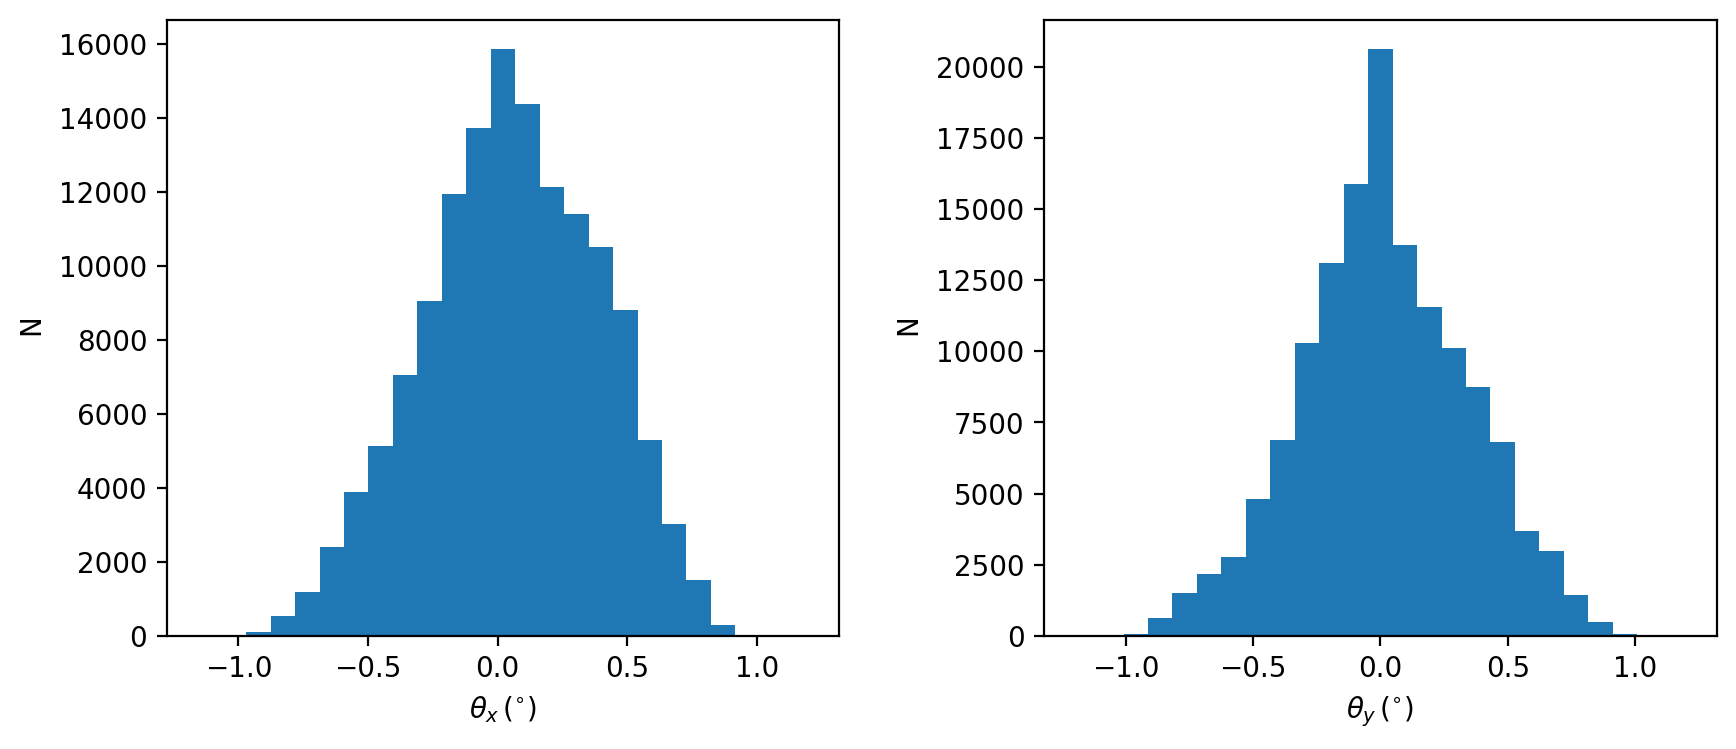

In [84]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize = (10, 4), dpi=200)
gs = gridspec.GridSpec(1, 9)
ax0 = fig.add_subplot(gs[:, :4])
ax1 = fig.add_subplot(gs[:, 5:])
nbins = 25
data_x, bins_x, p_x = ax0.hist(theta_x, nbins)
ax0.set_xlabel(r'$\theta_x \, (^{\circ})$')
ax0.set_ylabel(r'$\mathrm{N}$')
data_y, bins_y, p_y = ax1.hist(theta_y, nbins)
ax1.set_xlabel(r'$\theta_y \, (^{\circ})$')
ax1.set_ylabel(r'$\mathrm{N}$')
plt.show()